In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = Path("../data/example_data.hd5")

In [3]:
df = pd.read_hdf(file_path)
df = df.reset_index()
df

,PropertyID,DateTime,Value
0,300468,2020-01-01 00:00:00,65.992325
1,300468,2020-01-01 00:00:30,59.085239
2,300468,2020-01-01 00:01:00,63.399876
3,300468,2020-01-01 00:01:30,74.437500
4,300468,2020-01-01 00:02:00,60.391750
...,...,...,...
17007,315036,2020-01-01 23:54:00,113.592300
17008,315036,2020-01-01 23:55:00,113.462090
17009,315036,2020-01-01 23:56:00,113.505493
17010,315036,2020-01-01 23:58:00,113.042534


In [4]:
df_pivot = df.pivot(index='DateTime', columns='PropertyID', values='Value')
df_pivot.columns = [str(col) for col in df_pivot.columns]
df_pivot

,300468,300498,305256,315036,340686,341124,341550
DateTime,,,,,,,
2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
2020-01-01 00:00:30,59.085239,NaN,67.127098,NaN,1.691197,5.378604,1.403499
2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
2020-01-01 00:01:30,74.437500,NaN,71.723625,NaN,1.830390,5.459568,1.512679
2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172
...,...,...,...,...,...,...,...
2020-01-01 23:57:30,91.004448,NaN,72.401321,NaN,1.135774,1.400088,0.422443
2020-01-01 23:58:00,88.076408,2030.877808,60.180309,113.042534,1.058243,1.402138,0.439101
2020-01-01 23:58:30,84.573120,NaN,56.794193,NaN,1.017935,1.406347,0.406799


In [5]:
# count NaN values for each column
df_pivot.isnull().sum()

300468      20
300498    1433
305256      17
315036    1573
340686      17
341124      15
341550      17
dtype: int64

In [6]:
# fill values with forward fill method 
df_filled = df_pivot.fillna(method='ffill')
df_filled

,300468,300498,305256,315036,340686,341124,341550
DateTime,,,,,,,
2020-01-01 00:00:00,65.992325,2036.845581,58.777546,114.388023,1.737929,5.342316,1.386370
2020-01-01 00:00:30,59.085239,2036.845581,67.127098,114.388023,1.691197,5.378604,1.403499
2020-01-01 00:01:00,63.399876,2036.780151,72.960365,114.293983,1.861186,5.308666,1.416289
2020-01-01 00:01:30,74.437500,2036.780151,71.723625,114.293983,1.830390,5.459568,1.512679
2020-01-01 00:02:00,60.391750,2036.780518,70.489014,114.120377,1.729635,5.588947,1.548172
...,...,...,...,...,...,...,...
2020-01-01 23:57:30,91.004448,2031.101440,72.401321,113.505493,1.135774,1.400088,0.422443
2020-01-01 23:58:00,88.076408,2030.877808,60.180309,113.042534,1.058243,1.402138,0.439101
2020-01-01 23:58:30,84.573120,2030.877808,56.794193,113.042534,1.017935,1.406347,0.406799


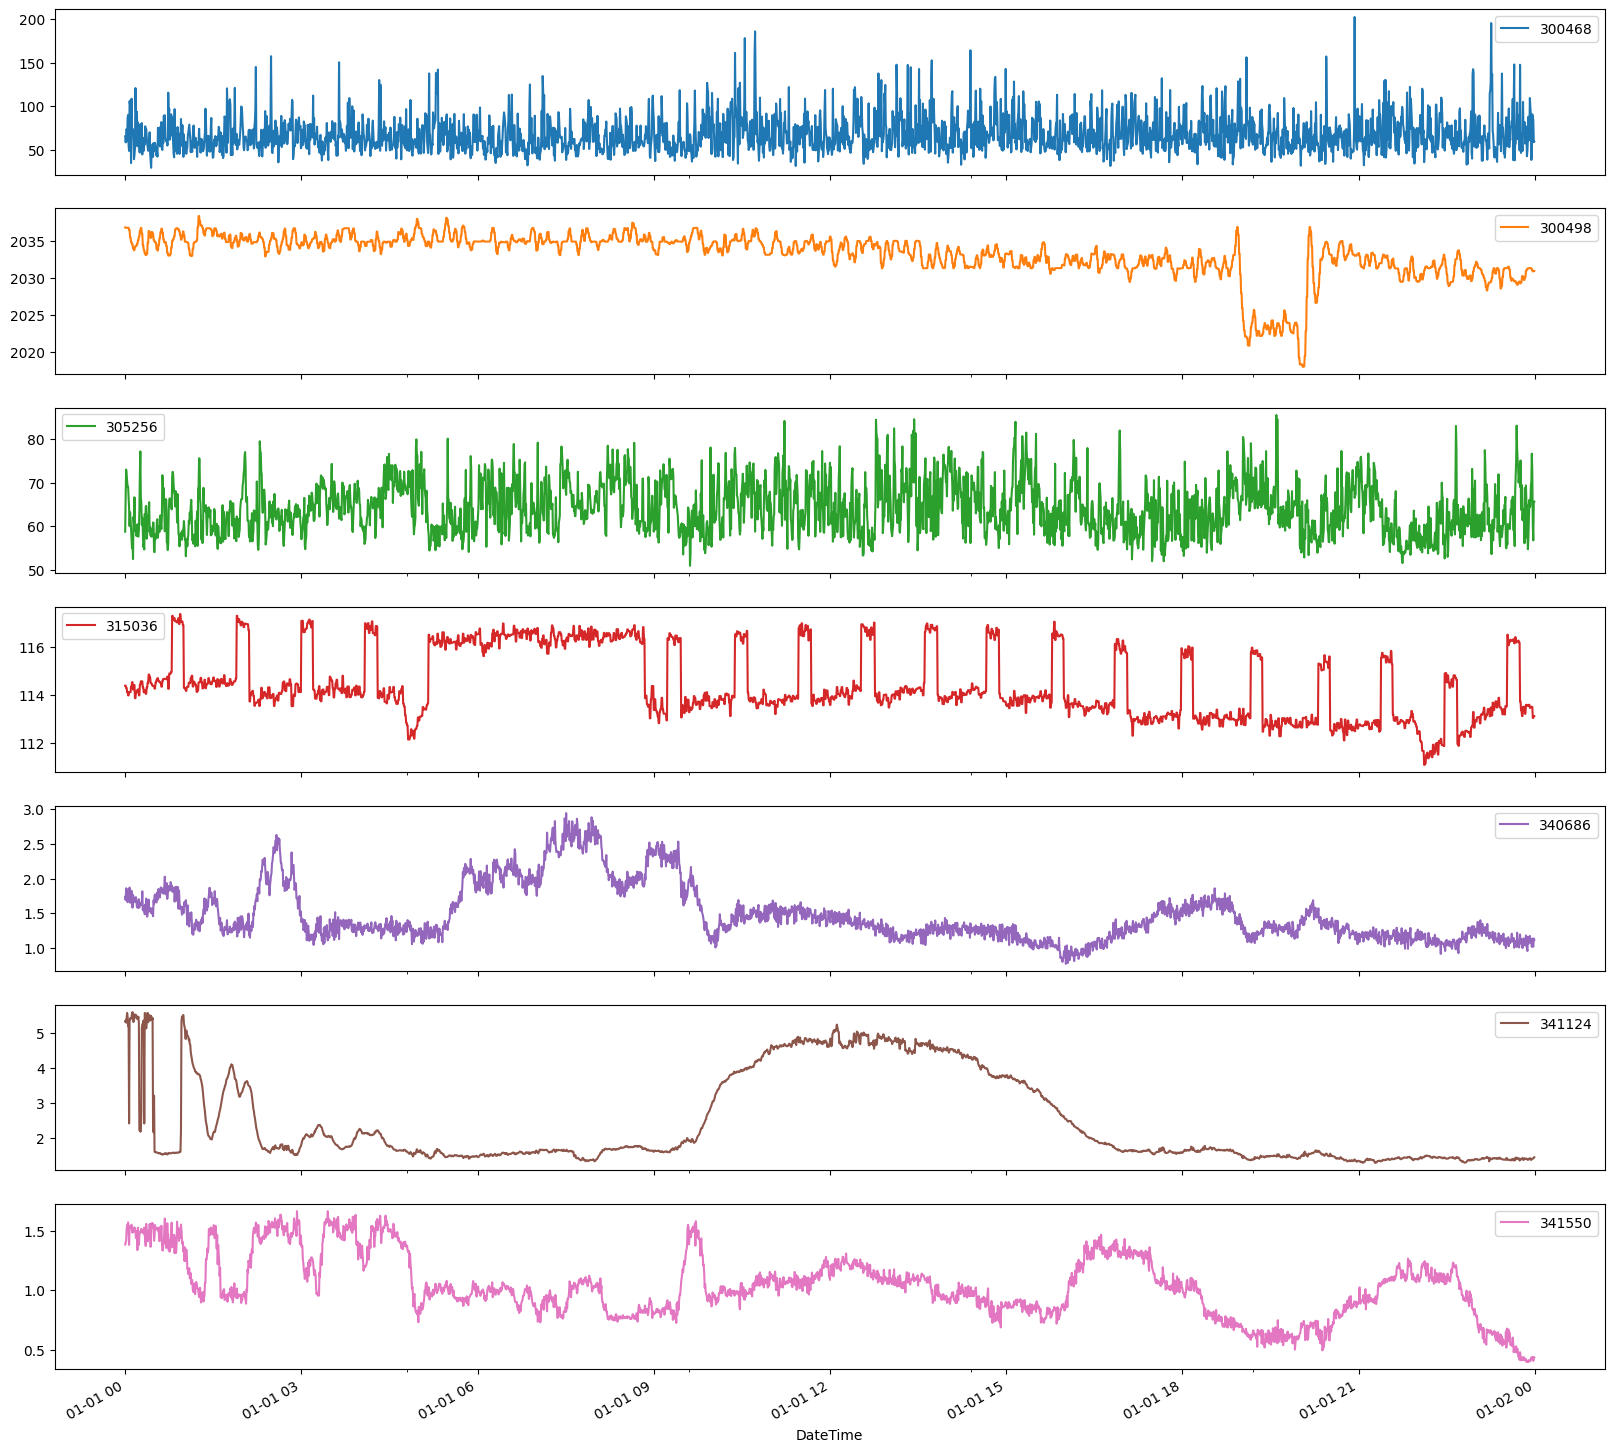

In [7]:
df_filled.plot(subplots=True, figsize=(20, 20))
plt.show()